# `C`onvolutional `N`eural `N`etworks
https://blog.csdn.net/Yellow_python/article/details/86589037

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
import numpy as np, matplotlib.pyplot as mp
%matplotlib inline
from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator  # 图像生成器
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import RMSprop  # 优化器
from tensorflow.python.keras.callbacks import EarlyStopping  # 提早停止训练

## 配置

In [2]:
batch_size = 128
epochs = 99
verbose = 2
min_delta = 1e-5  # 最小进步，低于该值将被认为没有进步
patience = 3  # 没有进步的训练轮数

## 内置数据集

In [3]:
from tensorflow.python.keras.datasets import cifar10  # 10分类小图像
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
input_shape = x_train.shape[1:]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 10)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 10)


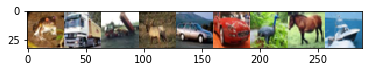

In [4]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)
mp.imshow(np.concatenate([x_train[i] for i in range(9)], axis=1))
mp.show()

## 数据增强

In [5]:
steps_per_epoch = len(y_train) / batch_size
idg_train = ImageDataGenerator(
    horizontal_flip=True,
    rescale=1/255).flow(x_train, y_train, batch_size)
idg_test = ImageDataGenerator(
    rescale=1/255).flow(x_test, y_test, batch_size)
del x_train, y_train, x_test, y_test  # 回收内存

## 建模

In [6]:
model = Sequential(name='CNN')
model.add(Conv2D(30, (3, 3), activation='relu', input_shape=input_shape))  # 输入尺寸使编译成功
model.add(MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
optimizer = RMSprop(lr=1e-3, decay=1e-6)
model.compile(optimizer, 'categorical_crossentropy', ['acc'])
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 30)        840       
_________________________________________________________________
MaxPooling2D (MaxPooling2D)  (None, 15, 15, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6750)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               675100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 676,950
Trainable params: 676,950
Non-trainable params: 0
_________________________________________________________________


## 训练

In [7]:
history = model.fit_generator(
    idg_train, steps_per_epoch, epochs, verbose,
    callbacks=[EarlyStopping('val_acc', min_delta, patience)],
    validation_data=idg_test, validation_steps=batch_size)

Epoch 1/99
391/390 - 30s - loss: 1.7322 - acc: 0.3865 - val_loss: 1.5350 - val_acc: 0.4678
Epoch 2/99
391/390 - 28s - loss: 1.3825 - acc: 0.5127 - val_loss: 1.2960 - val_acc: 0.5467
Epoch 3/99
391/390 - 28s - loss: 1.2589 - acc: 0.5598 - val_loss: 1.2289 - val_acc: 0.5761
Epoch 4/99
391/390 - 28s - loss: 1.1763 - acc: 0.5913 - val_loss: 1.1549 - val_acc: 0.5959
Epoch 5/99
391/390 - 28s - loss: 1.1171 - acc: 0.6134 - val_loss: 1.1422 - val_acc: 0.5967
Epoch 6/99
391/390 - 28s - loss: 1.0664 - acc: 0.6296 - val_loss: 1.1222 - val_acc: 0.6042
Epoch 7/99
391/390 - 28s - loss: 1.0221 - acc: 0.6441 - val_loss: 1.0183 - val_acc: 0.6472
Epoch 8/99
391/390 - 29s - loss: 0.9879 - acc: 0.6578 - val_loss: 1.0490 - val_acc: 0.6342
Epoch 9/99
391/390 - 30s - loss: 0.9526 - acc: 0.6726 - val_loss: 1.0599 - val_acc: 0.6325
Epoch 10/99
391/390 - 29s - loss: 0.9176 - acc: 0.6831 - val_loss: 1.0849 - val_acc: 0.6224


## 损失曲线和精度曲线

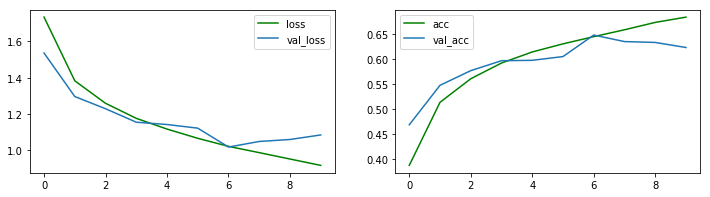

In [8]:
ls = ['loss', 'val_loss', 'acc', 'val_acc']
hs = [history.history[i] for i in ls]
le = len(hs[0])
mp.figure(figsize=[12, 3])
for i in (0, 1):
    mp.subplot(1, 2, i + 1)
    mp.plot(range(le), hs[i * 2], 'g', label=ls[i * 2])
    mp.plot(range(le), hs[i * 2 + 1], label=ls[i * 2 + 1])
    mp.legend()
mp.show()